In [1]:
# Dependencies and Setup
import matplotlib.pyplot as plt
import pandas as pd
import scipy.stats as st
import numpy as np

# Study data files
path = "arizona_data - Table 5.csv"

# Read in Arizona census data
arizona = pd.read_csv(path)


# Display the data table for preview
arizona.head()

,Year,nh_white,nh_black,nh_native_am,nh_asian,nh_other,hispanic,total_pop
0,2018,3850325,274972,282706,239961,141604,2286631,7076199
1,2019,3882109,280653,285994,248161,144559,2342154,7183628
2,2020,3910522,286177,288809,256247,147459,2396935,7286148
3,2021,3937867,291672,291550,264330,150404,2452012,7387836
4,2022,3964431,297153,294220,272426,153403,2507489,7489121


In [2]:
# Read in voter data and display
# 2016 voter breakdown by political party. Based on CNN exit polls

voter_path = "voter_breakdown_2016 - arizona.csv"

race_voter = pd.read_csv(voter_path)
race_voter = race_voter.groupby(['race']).sum()
race_voter

,clinton,trump
race,,
asian,65,37
black,89,8
latino,61,32
white,40,54


In [3]:
from turnout import turnout_allgender
turnout_allgender

,voting_rate
race,
nh_white,64.1
black,55.9
hispanic,32.5
asian,33.9


In [4]:
# Clean data for plotting racial data over time
# No breakdown by age or gender

total_pop = arizona['total_pop']
years = arizona['Year']

demographic_data = arizona.set_index('Year')
demographic_data = demographic_data[['nh_white','nh_black','hispanic','nh_asian']]

demographic_data.head()

,nh_white,nh_black,hispanic,nh_asian
Year,,,,
2018,3850325,274972,2286631,239961
2019,3882109,280653,2342154,248161
2020,3910522,286177,2396935,256247
2021,3937867,291672,2452012,264330
2022,3964431,297153,2507489,272426


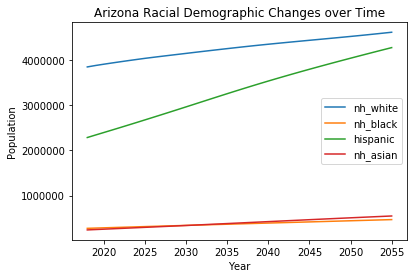

In [5]:
# Plot race over time
demographic_data.plot(title = 'Arizona Racial Demographic Changes over Time')
plt.ylabel('Population')
plt.show()



In [6]:
rep_breakdown = race_voter['trump'] / 100
rate = turnout_allgender['voting_rate'] / 100

rep_white = demographic_data['nh_white'] * rate[0] * rep_breakdown[3]
rep_black = demographic_data['nh_black'] * rate[1] * rep_breakdown[1]
rep_hispanic = demographic_data['hispanic'] * rate[2] * rep_breakdown[2]
rep_asian = demographic_data['nh_asian'] * rate[3] * rep_breakdown[0]

rep_total = rep_white + rep_black + rep_hispanic + rep_asian

rep_forecast_df = pd.DataFrame({
    'White': rep_white,
    'Black': rep_black,
    'Hispanic': rep_hispanic,
    'Asian': rep_asian
   }, index=years)

rep_forecast_df.head()


,White,Black,Hispanic,Asian
Year,,,,
2018,1.332751e+06,12296.74784,237809.624,30098.30823
2019,1.343753e+06,12550.80216,243584.016,31126.83423
2020,1.353588e+06,12797.83544,249281.240,32141.06121
2021,1.363053e+06,13043.57184,255009.248,33154.91190
2022,1.372248e+06,13288.68216,260778.856,34170.39318


In [7]:
dem_breakdown = race_voter['clinton'] / 100
rate = turnout_allgender['voting_rate'] / 100

dem_white = demographic_data['nh_white'] * rate[0] * dem_breakdown[3]
dem_black = demographic_data['nh_black'] * rate[1] * dem_breakdown[1]
dem_hispanic = demographic_data['hispanic'] * rate[2] * dem_breakdown[2]
dem_asian = demographic_data['nh_asian'] * rate[3] * dem_breakdown[0]

dem_total = dem_white + dem_black + dem_hispanic + dem_asian

dem_forecast_df = pd.DataFrame({
    'White': dem_white,
    'Black': dem_black,
    'Hispanic': dem_hispanic,
    'Asian': dem_asian
   }, index=years)

dem_forecast_df.head()


,White,Black,Hispanic,Asian
Year,,,,
2018,9.872233e+05,136801.31972,453324.59575,52875.40635
2019,9.953727e+05,139627.67403,464332.03050,54682.27635
2020,1.002658e+06,142375.91927,475192.36375,56464.02645
2021,1.009669e+06,145109.73672,486111.37900,58245.11550
2022,1.016480e+06,147836.58903,497109.69425,60029.06910


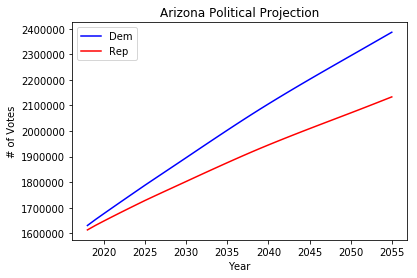

In [8]:
forecast_df = pd.DataFrame({
   'Dem': dem_total,
   'Rep': rep_total
   }, index=years)

forecast_df.head()

plt.plot(years,dem_total, label = "Dem", color = 'b')
plt.plot(years,rep_total, label = "Rep", color = 'r')
plt.ylabel('# of Votes')
plt.xlabel('Year')
plt.title('Arizona Political Projection')
plt.legend(loc='best')
plt.show()

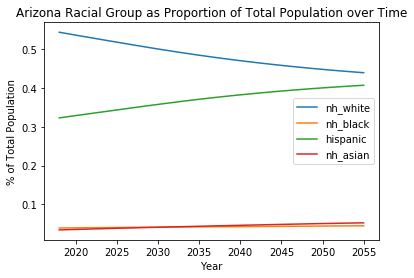

,nh_white,nh_black,hispanic,nh_asian
Year,,,,
2018,0.544123,0.038859,0.323144,0.033911
2019,0.540411,0.039068,0.326041,0.034545
2020,0.536706,0.039277,0.328971,0.035169
2021,0.533020,0.039480,0.331899,0.035779
2022,0.529359,0.039678,0.334818,0.036376


In [20]:
percent_path = "arizona_data - Table 6.csv"
arizona_percent = pd.read_csv(percent_path)


arizona_percent = arizona_percent[['nh_white','nh_black','hispanic','nh_asian']]
arizona_percent = arizona_percent.set_index(years)


arizona_percent.plot(title = 'Arizona Racial Group as Proportion of Total Population over Time')
plt.xlabel('Year')
plt.ylabel('% of Total Population')
plt.show()

arizona_percent.head()

